# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [166]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [167]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_proper = city.title()
    city_url = f"{url}weather?q={city_proper}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | el calafate
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | laojunmiao
Processing Record 5 of Set 1 | acarau
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | kodiak
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | sitka
Processing Record 12 of Set 1 | centerville
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | sandnessjoen
Processing Record 15 of Set 1 | bubaque
Processing Record 16 of Set 1 | powell
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | beypore
Processing Record 19 of Set 1 | sinabang
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | margaret river
Processing Record 22 of Set 1 | port elizabeth
Proce

In [168]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [169]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,5.80,75,100,1.25,CL,1733730940
1,el calafate,-50.3408,-72.2768,7.69,56,100,2.81,AR,1733730941
2,blackmans bay,-43.0167,147.3167,17.63,57,100,1.34,AU,1733730943
3,laojunmiao,39.8333,97.7333,-7.53,62,100,2.22,CN,1733730944
4,acarau,-2.8856,-40.1200,26.00,82,100,5.26,BR,1733730945
5,whitehorse,60.7161,-135.0538,-12.57,92,20,1.54,CA,1733730946
6,ilulissat,69.2167,-51.1000,-3.99,46,48,9.77,GL,1733730948
7,waitangi,-43.9535,-176.5597,16.57,97,100,3.58,NZ,1733730949
8,kodiak,57.7900,-152.4072,5.73,100,100,8.75,US,1733730950
9,port-aux-francais,-49.3500,70.2167,2.54,73,87,10.38,TF,1733730951


In [170]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [171]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,5.80,75,100,1.25,CL,1733730940
1,el calafate,-50.3408,-72.2768,7.69,56,100,2.81,AR,1733730941
2,blackmans bay,-43.0167,147.3167,17.63,57,100,1.34,AU,1733730943
3,laojunmiao,39.8333,97.7333,-7.53,62,100,2.22,CN,1733730944
4,acarau,-2.8856,-40.1200,26.00,82,100,5.26,BR,1733730945
5,whitehorse,60.7161,-135.0538,-12.57,92,20,1.54,CA,1733730946
6,ilulissat,69.2167,-51.1000,-3.99,46,48,9.77,GL,1733730948
7,waitangi,-43.9535,-176.5597,16.57,97,100,3.58,NZ,1733730949
8,kodiak,57.7900,-152.4072,5.73,100,100,8.75,US,1733730950


In [172]:
# Check data types
city_data_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

In [173]:
# Check for null values
city_data_df.isnull().sum()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       2
Date          0
dtype: int64

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

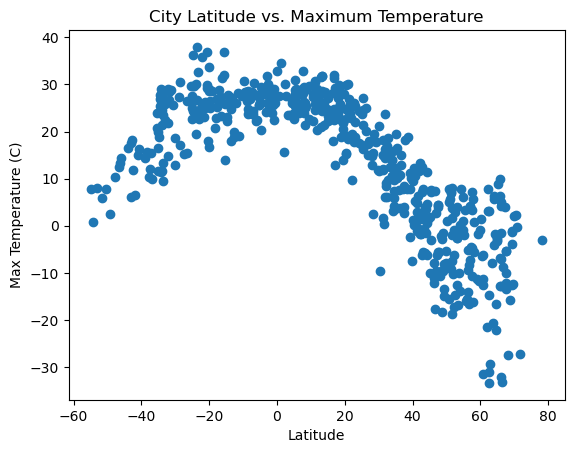

In [174]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Maximum Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

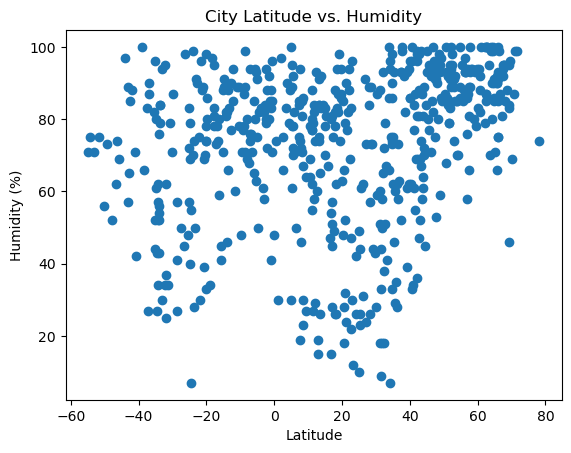

In [175]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

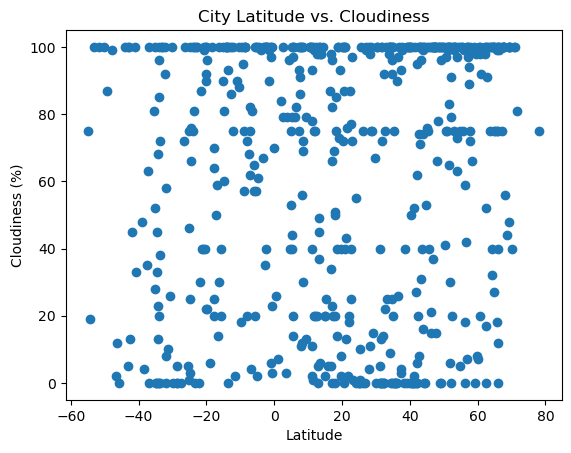

In [176]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

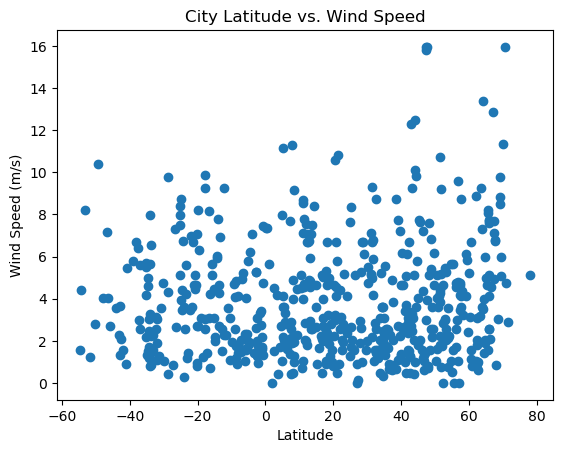

In [177]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [178]:
# Define a function to create Linear Regression plots

# Define function and intake variables
def linear_regression(xvalues, yvalues, xlabel, ylabel):
    #Use linregress to get slope, intercept, and other values
    slope, intercept, r_value, p_value, std_err = linregress(xvalues, yvalues)
    #Calculate y values
    regressvalues = slope * xvalues + intercept
    # Create scatter plot and linear regression line 
    plt.scatter(xvalues, yvalues)
    plt.plot(xvalues, regressvalues, color = 'red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} vs. {ylabel}')
    plt.show()
    print(f'slope: {round(slope, 5)}')
    print(f'r-squared value: {round(r_value, 5)}')
    print(f'standard error: {round(std_err, 5)}')
    print('')
    

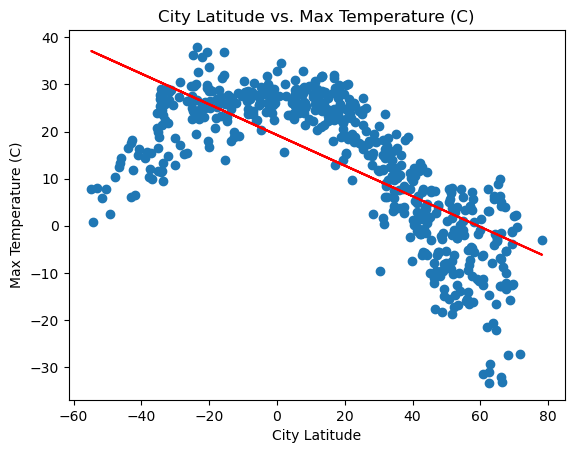

slope: -0.32538
r-squared value: -0.70877
standard error: 0.01372



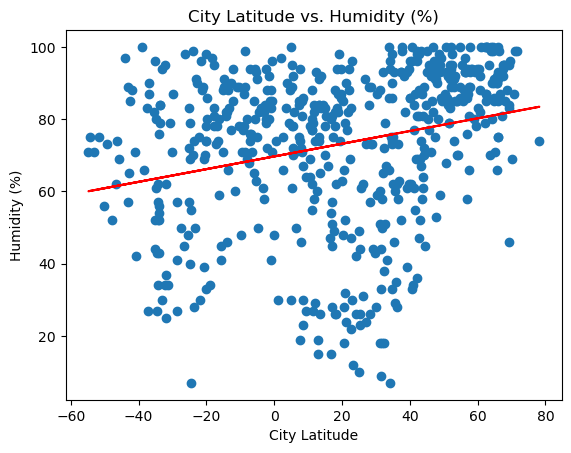

slope: 0.17579
r-squared value: 0.25999
standard error: 0.02766



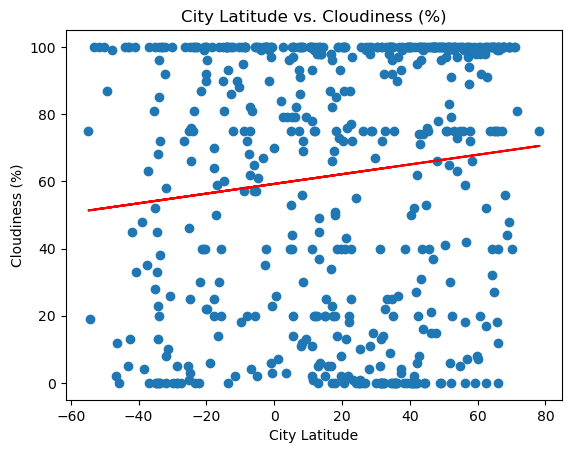

slope: 0.14444
r-squared value: 0.11936
standard error: 0.05091



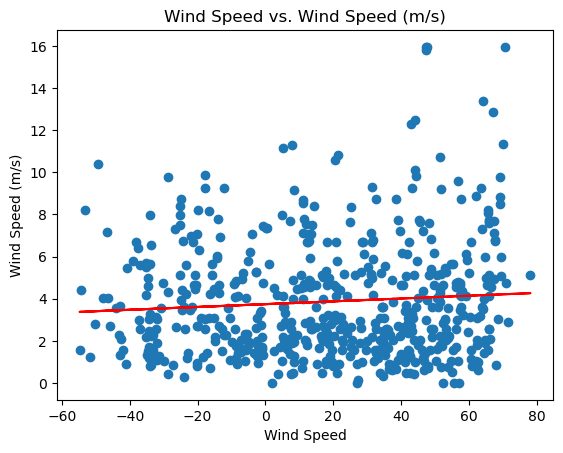

slope: 0.00667
r-squared value: 0.07808
standard error: 0.00361



In [179]:
# Run function on each relationship
linear_regression(city_data_df['Lat'], city_data_df['Max Temp'], 'City Latitude', 'Max Temperature (C)')
linear_regression(city_data_df['Lat'], city_data_df['Humidity'], 'City Latitude', 'Humidity (%)')
linear_regression(city_data_df['Lat'], city_data_df['Cloudiness'], 'City Latitude', 'Cloudiness (%)')
linear_regression(city_data_df['Lat'], city_data_df['Wind Speed'], 'Wind Speed', 'Wind Speed (m/s)')

In [180]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,laojunmiao,39.8333,97.7333,-7.53,62,100,2.22,CN,1733730944
5,whitehorse,60.7161,-135.0538,-12.57,92,20,1.54,CA,1733730946
6,ilulissat,69.2167,-51.1000,-3.99,46,48,9.77,GL,1733730948
8,kodiak,57.7900,-152.4072,5.73,100,100,8.75,US,1733730950
10,sitka,57.0531,-135.3300,3.94,87,100,0.00,US,1733730953
11,centerville,39.6284,-84.1594,10.03,94,100,7.20,US,1733730820
13,sandnessjoen,66.0217,12.6316,4.12,75,75,7.72,NO,1733730956
14,bubaque,11.2833,-15.8333,25.83,55,100,4.68,GW,1733730957
15,powell,40.1578,-83.0752,9.52,96,100,1.34,US,1733730959


In [181]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,5.80,75,100,1.25,CL,1733730940
1,el calafate,-50.3408,-72.2768,7.69,56,100,2.81,AR,1733730941
2,blackmans bay,-43.0167,147.3167,17.63,57,100,1.34,AU,1733730943
4,acarau,-2.8856,-40.1200,26.00,82,100,5.26,BR,1733730945
7,waitangi,-43.9535,-176.5597,16.57,97,100,3.58,NZ,1733730949
9,port-aux-francais,-49.3500,70.2167,2.54,73,87,10.38,TF,1733730951
12,port mathurin,-19.6833,63.4167,25.00,80,96,6.29,MU,1733730955
20,margaret river,-33.9500,115.0667,21.39,52,0,7.96,AU,1733730965
21,port elizabeth,-33.9180,25.5701,25.17,76,20,5.66,ZA,1733730966


In [182]:
# Get value count of cities of both data frames and calculate % split
total_city_count = city_data_df['City'].count()
northern_hemi_city_count = northern_hemi_df['City'].count()
southern_hemi_city_count = southern_hemi_df['City'].count()

northern_hemi_city_perc = (northern_hemi_city_count / total_city_count) * 100
southern_hemi_city_perc = (southern_hemi_city_count / total_city_count) * 100

# Print calculations 
print(f'Northern hemisphere cities: {northern_hemi_city_count} ({round(northern_hemi_city_perc, 1)}% of data set)')
print(f'Southern hemisphere cities: {southern_hemi_city_count} ({round(southern_hemi_city_perc, 1)}% of data set)')

Northern hemisphere cities: 390 (69.8% of data set)
Southern hemisphere cities: 169 (30.2% of data set)


###  Temperature vs. Latitude Linear Regression Plot

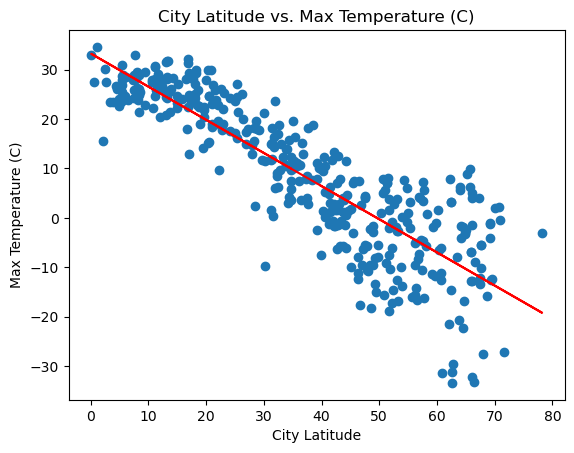

slope: -0.67059
r-squared value: -0.8656
standard error: 0.01969



In [193]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'City Latitude', 'Max Temperature (C)')

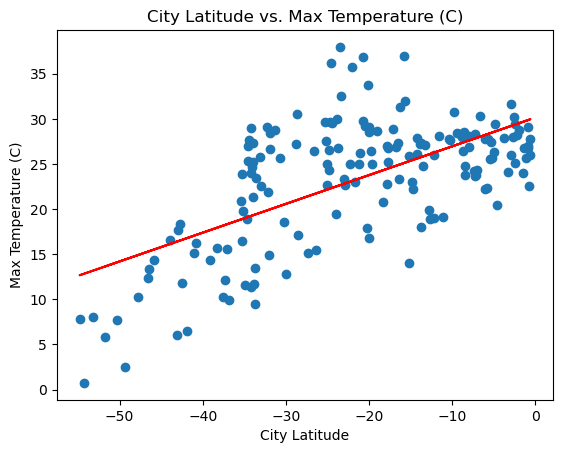

slope: 0.31912
r-squared value: 0.62776
standard error: 0.03062



In [194]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'City Latitude', 'Max Temperature (C)')

In [195]:
# Find northernmost and southernmost cities in data 

northernmost_lat = city_data_df['Lat'].max()
northernmost_city = city_data_df.loc[city_data_df['Lat'] == northernmost_lat, 'City'].values[0]

southernmost_lat = city_data_df['Lat'].min()
southernmost_city = city_data_df.loc[city_data_df['Lat'] == southernmost_lat, 'City'].values[0]

print(f'Northernmost city in data: {northernmost_city} at latitude {northernmost_lat}')
print(f'Southernmost city in data: {southernmost_city} at latitude {southernmost_lat}')

Northernmost city in data: longyearbyen at latitude 78.2186
Southernmost city in data: ushuaia at latitude -54.8


**Discussion about the linear relationship:** For the northern hemisphere, max temperature decreases as latitude increases, meaning cities tend to have cooler max temperatures the further they are from the equator. Similarly, max temperature increases with latitude, or decreases with negative latitude, which again means that cities tend to be cooler when they're further from the equator. This lines up with common knowledge about temperatures on earth; the equator is the cloesest to the sun on average and therefore is quite hot, while areas tend to be colder the further they are from the equator. It should be noted that the slope of the regression line for the northern hemisphere is steeper than that of the southern hemisphere. This is likely due to the difference in geography of the continents in both hemispheres. Northern hemisphere continents extend further north than southern hemisphere continents do south; The northernmost countries in the world, such as Russia, Canada, Iceland, and Greenland, are significantly closer to the north pole than the southernmost countries in the world, Chile, which has a noticeable geographic gap to the south pole. This is reflected in the data; the northernmost city in the data, Longyearbyen, Norway, sits at a latitude of 78.2, which is a full 23.4 degrees further further from the equator than the southernmost city in the data set, Ushuaia, Argentina, sitting at -54.8 degrees. There's also a noticeable gap in the r-squared values between the two hemispheres' regression lines: -0.851 for the northern hemisphere, versus 0.615 for the southern hemisphere. This means max temperature is more closely correlated with distance from the equator in the northern hemipshere than in the southern hemishphere. My theory is that the higher landmass of the northern hemisphere means a higher portion of northern cities in the data set are inland and therefore less suscepible to large temperature swings that the ocean can bring, whereas a higher portion of southern hemisphere cities are coastal cities and therefore see higher maximum temperatures as a result of the volatility that comes with coastal regions. Also, the r-squared value may also be lower for the southern hemisphere partially because there are simply fewer cities in that hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

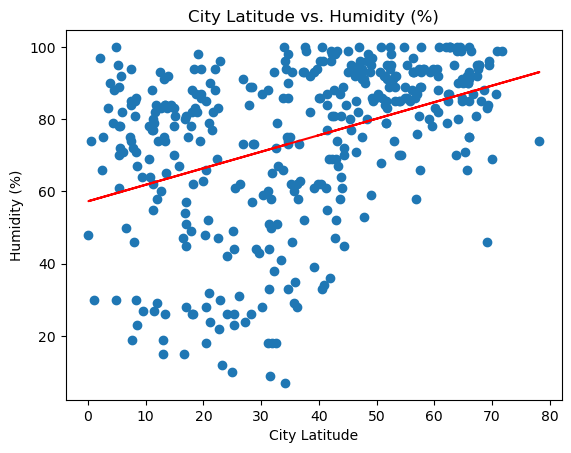

slope: 0.457
r-squared value: 0.39433
standard error: 0.05407



In [186]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'City Latitude', 'Humidity (%)')

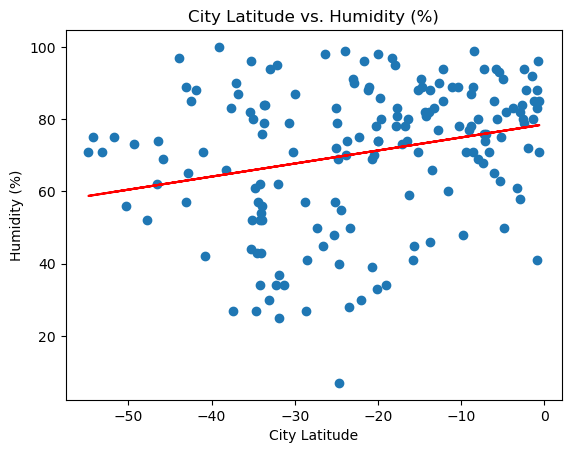

slope: 0.36134
r-squared value: 0.25578
standard error: 0.10568



In [187]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'City Latitude', 'Humidity (%)')

In [188]:
northern_hemi_low_humidity_cities = northern_hemi_df[northern_hemi_df['Humidity'] < 25]['City'].count()
northern_hemi_low_humidity_cities_perc = (northern_hemi_low_humidity_cities / northern_hemi_city_count) * 100
southern_hemi_low_humidity_cities = southern_hemi_df[southern_hemi_df['Humidity'] < 25]['City'].count()
southern_hemi_low_humidity_cities_perc = (southern_hemi_low_humidity_cities / southern_hemi_city_count) * 100


print(f'Northern hemisphere low-humidity cities: {northern_hemi_low_humidity_cities} ({round(northern_hemi_low_humidity_cities_perc, 2)}% of northern hemisphere cities)')
print(f'Southern hemisphere low-humidity cities: {southern_hemi_low_humidity_cities} ({round(southern_hemi_low_humidity_cities_perc, 2)}% of southern hemisphere cities)')

Northern hemisphere low-humidity cities: 17 (4.36% of northern hemisphere cities)
Southern hemisphere low-humidity cities: 1 (0.59% of southern hemisphere cities)


**Discussion about the linear relationship:** Interestingly, humidity seems to have two different relationships to latitude/distance to the equator in the northern hemisphere vs. southern hemisphere cities. In the northern hemisphere, the regression line indicates that humidity increases the further away from the equator you travel, whereas the opposite is true in the southern hemisphere, where humidity increases in cities that are closer to the equator and decreases in cities further away from the equator. The fact that the data is comprised of cities and therefore doesn't include data from uninhabited areas of the world likely accounts for some of this trend. The northern hemisphere contains significant human settlements in low humidity environments, while low-humidity areas in the southern hemisphere tend to be sparsely populated. In the data set, there are 17 cities with low humidity (less than 25% humidity), which is 4.36% of northern hemisphere cities, while the southern hemisphere only features 1 low-humity city, which is only 0.59% of cities in the southern hemisphere. 

It's also worth noting, though, that the r-squared value is somewhat ow for both hemispheres: 0.39433 for the northern hemisphere and 0.25578 for the southern hemisphere, indicating that there isn't a particularly strong relationship between latitude and humidity, and there are other geographical factors that have significant influence on humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

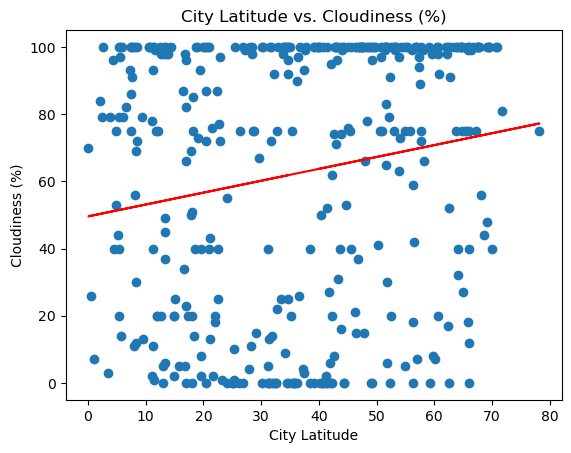

slope: 0.35355
r-squared value: 0.17525
standard error: 0.10083



In [189]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'City Latitude', 'Cloudiness (%)')

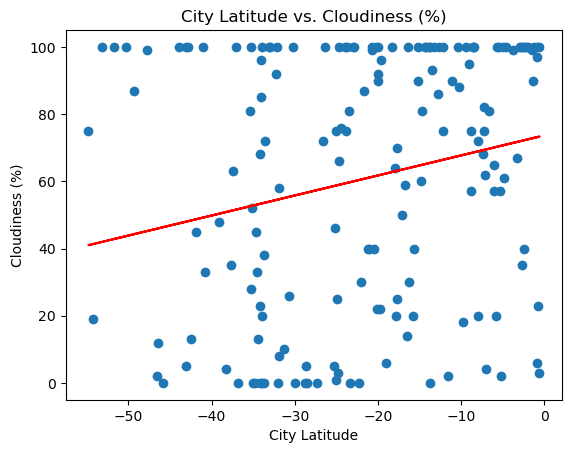

slope: 0.59641
r-squared value: 0.21681
standard error: 0.2078



In [190]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'City Latitude', 'Cloudiness (%)')

**Discussion about the linear relationship:** The regression lines for cloudiness vs latitude mirror the line for humidity in the previous section; cities further north from the equator tend to be cloudier, while cities further south from the equator tend to be less cloudy, compared to cities closer to the equator. This makes sense; humidity and cloudiness are closely related phenomenons. 

The r-squared value for both regressions are even lower than those of the humidity regression lines. This indicates there is a fairly weak relationship between latitude and cloudiness. Other geographical factors that are not captured in this data, such as the proximity of cities to weather-affecting geograpgical features such as bodies of water or mountains, likely has a more significant effect on cloudiness. 

### Wind Speed vs. Latitude Linear Regression Plot

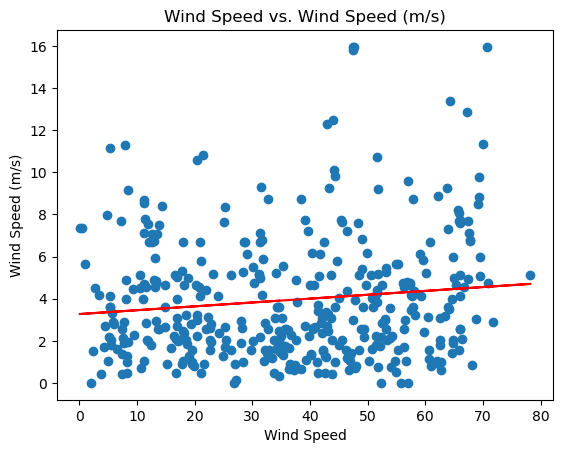

slope: 0.01832
r-squared value: 0.12245
standard error: 0.00754



In [191]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 'Wind Speed (m/s)')

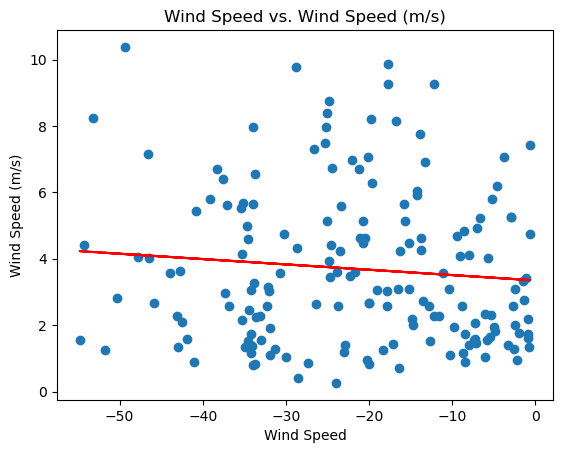

slope: -0.01609
r-squared value: -0.09627
standard error: 0.01287



In [192]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', 'Wind Speed (m/s)')

**Discussion about the linear relationship:** It appears that, of the variables in the data I've analyzed, wind speed is the least tied to latitude, with an r-squared value of only 0.12245 and -0.09627 for the northern and southern hemispheres, respectively. Also, the slope for both regression lines is below 0.02, further indicating a weak relationsip. Other geographical features that are known to affect wind, such as proximity to mountains, oceans, large lakes, etc. likely plays a much larger role in the wind speeds of any given city than latitude. 